In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Benchmarking.csv')

In [80]:
# Getting a basic grasp on the database
print(df.shape)
print(df.info())
print(df.describe())

(26874, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26874 entries, 0 to 26873
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   monitor_id          26874 non-null  int64         
 1   ts                  26874 non-null  datetime64[ns]
 2   soc                 26874 non-null  float64       
 3   solar_yield         24369 non-null  float64       
 4   consumption         24526 non-null  float64       
 5   grid_in             2487 non-null   float64       
 6   grid_out            772 non-null    float64       
 7   site_name           26874 non-null  object        
 8   kwp_stc             26874 non-null  float64       
 9   size                26874 non-null  object        
 10  commissioning_date  26874 non-null  object        
 11  group_name          26874 non-null  object        
 12  kva                 26874 non-null  float64       
 13  battery             26669 non-null

In [79]:
# null fields
print(df.isnull().sum())

monitor_id                0
ts                        0
soc                       0
solar_yield            2505
consumption            2348
grid_in               24387
grid_out              26102
site_name                 0
kwp_stc                   0
size                      0
commissioning_date        0
group_name                0
kva                       0
battery                 205
hour                      0
normalized_yield       2505
dtype: int64


In [77]:
# Formating the time to standard date_time
df['ts'] = pd.to_datetime(df['ts'])
# Extracting the hour
df['hour'] = df['ts'].dt.hour
# Normalized solar yield
df['normalized_yield'] = df['solar_yield']/df['kwp_stc']

   hour  normalized_yield
0     6          0.072702
1     7          0.078710
2     8          0.072786
3     9          0.066214
4    10          0.058212
5    11          0.052193
6    12          0.042850
7    13          0.026006
8    14          0.008505
9    15          0.000834


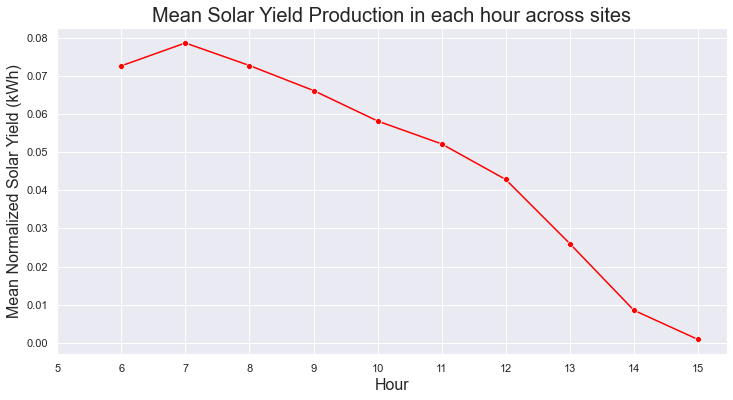

In [85]:
# Grouped each hour and calculated the mean solar yield for each hour across sites
hour = df.groupby('hour')['normalized_yield'].mean().reset_index()
print(hour)
sns.set(style="darkgrid")
#Plotting the mean solar yield against each hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='normalized_yield', data=hour, marker='o', color='red')
plt.title('Mean Solar Yield Production in each hour across sites', fontsize=20)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Mean Normalized Solar Yield (kWh)', fontsize=16)
plt.xticks(range(5,16,1))
plt.show()